In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
import geopandas as gpd
from shapely.geometry import Point
from bokeh.plotting import figure, output_notebook, show
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import ColumnDataSource
from ipywidgets import interact

In [3]:
# Notebook Styling 
sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

In [51]:
global_deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
global_confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [52]:
global_deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5


In [53]:
global_confirmed_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146


In [41]:
global_recovered_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,3/3/2020,3/4/2020,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020,3/15/2020,3/16/2020,3/17/2020,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10


In [67]:
def preprocess_covid_data(df=global_deaths_df):
    df=df.copy()
    df['location'] = df.apply(lambda x: f"{x['Province/State']}, {x['Country/Region']}" if pd.notnull(x['Province/State']) else x['Country/Region'], axis=1)
    locations_df = df[['location', 'Lat', 'Long']].copy()
    df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
    df.set_index('location', inplace=True)
    df.index.name = None
    df = df.T
    df.reset_index(inplace=True)
    df.rename({'index':'date'}, axis=1, inplace=True)
    date_len = len(df.loc[0:0, 'date'][0])
    if date_len <= 7:
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
    else:
        df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
    return (locations_df, df)                            

In [68]:
death_locations, deaths_df = preprocess_covid_data(df=global_deaths_df)
confirmed_locations, confirmed_df = preprocess_covid_data(df=global_confirmed_df)
recovered_locations, recovered_df = preprocess_covid_data(df=global_recovered_df)

In [69]:
deaths_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis
61,2020-03-23,1,4,17,1,0,0,4,0,0,6,0,0,0,0,0,1,21,1,0,2,3,0,0,88,0,0,0,1,34,0,3,4,0,0,0,1,13,0,0,0,0,0,6,0,4,0,0,0,2,6,8,6,1,2,8,2,2,6,6,13,22,4,3153,4,1,0,1,1,2,0,0,0,3,7,4,0,3,3,0,3,2,1,3,0,1,2,0,1,8,1,1,1,0,0,24,0,3,18,19,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,860,1,1,0,123,2,17,1,0,1,0,0,0,7,1,10,49,1812,23,6,1,6077,1,42,0,0,0,111,0,0,0,4,0,0,1,8,0,14,0,0,0,2,3,1,0,0,1,4,0,0,0,1,0,213,0,0,0,1,2,10,0,6,6,0,1,5,33,8,23,0,7,1,0,0,0,20,0,0,3,0,2,0,3,0,0,2311,0,1,0,25,120,2,0,1,0,0,3,37,0,3,2,0,1,0,0,0,0,335,0,557,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
62,2020-03-24,1,5,19,1,0,0,6,0,0,7,0,0,0,0,0,1,28,1,0,3,4,0,0,122,0,0,0,3,46,0,3,4,1,0,0,1,13,0,0,0,0,0,7,0,4,0,0,0,2,6,8,6,1,2,8,2,2,6,6,13,22,4,3160,4,1,0,1,1,2,0,0,0,3,7,4,0,3,3,0,3,2,1,3,0,2,2,0,1,10,1,3,3,0,0,32,0,6,27,2

In [70]:
confirmed_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,"Alberta, Canada","British Columbia, Canada","Grand Princess, Canada","Manitoba, Canada","New Brunswick, Canada","Newfoundland and Labrador, Canada","Nova Scotia, Canada","Ontario, Canada","Prince Edward Island, Canada","Quebec, Canada","Saskatchewan, Canada",Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Diamond Princess,Cuba,Cyprus,Czechia,"Faroe Islands, Denmark","Greenland, Denmark",Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France","Martinique, France",France,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands","Sint Maarten, Netherlands",Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Isle of Man, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,"Diamond Princess, Canada",Dominica,Grenada,Mozambique,Syria,Timor-Leste,Belize,"Recovered, Canada",Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis
61,2020-03-23,40,104,230,133,3,3,301,235,32,669,5,319,134,28,355,140,4474,72,4,377,33,17,81,3743,5,2,27,136,1924,91,201,99,3,87,56,301,472,13,20,17,24,41,503,3,628,66,3,1,746,990,537,578,313,136,1415,254,146,168,319,484,1274,356,67800,1018,75,633,936,93,127,24,75,18,248,768,404,134,543,141,1,76,176,1238,277,4,36,158,25,315,712,40,116,1236,118,4,1450,3,245,981,366,3,9,1,352,4,11,3,700,20,18,62,24,8,71,3,8,53,19856,5,2,61,29056,27,695,20,4,20,6,1,30,167,588,499,579,23049,266,1125,1071,63927,19,1128,127,62,16,8961,189,16,180,267,3,51,179,875,12,1518,13,107,2,36,316,109,23,10,27,143,4,2,9,4,2,4749,102,2,3,40,136,2621,66,875,345,1,22,395,462,749,2060,501,576,438,36,3,1,187,562,79,249,7,509,186,442,1,402,35136,97,2,5,2046,8795,195,12,721,18,51,89,1529,9,73,198,6,5,36,15,13

In [71]:
recovered_df.tail(3)

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","From Diamond Princess, Australia","New South Wales, Australia","Northern Territory, Australia","Queensland, Australia","South Australia, Australia","Tasmania, Australia","Victoria, Australia","Western Australia, Australia",Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,"Anhui, China","Beijing, China","Chongqing, China","Fujian, China","Gansu, China","Guangdong, China","Guangxi, China","Guizhou, China","Hainan, China","Hebei, China","Heilongjiang, China","Henan, China","Hong Kong, China","Hubei, China","Hunan, China","Inner Mongolia, China","Jiangsu, China","Jiangxi, China","Jilin, China","Liaoning, China","Macau, China","Ningxia, China","Qinghai, China","Shaanxi, China","Shandong, China","Shanghai, China","Shanxi, China","Sichuan, China","Tianjin, China","Tibet, China","Xinjiang, China","Yunnan, China","Zhejiang, China",Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,"Diamond Princess, Cruise Ship",Cuba,Cyprus,Czechia,Denmark,"Faroe Islands, Denmark","Greenland, Denmark",Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,"French Guiana, France","French Polynesia, France","Guadeloupe, France","Guadeloupe, France","Mayotte, France","New Caledonia, France","Reunion, France","Saint Barthelemy, France","St Martin, France",Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guatemala,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,"Martinique, France",Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,"Aruba, Netherlands","Curacao, Netherlands",Netherlands,"Sint Maarten, Netherlands",New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,"Bermuda, United Kingdom","Cayman Islands, United Kingdom","Channel Islands, United Kingdom","Gibraltar, United Kingdom","Guernsey, United Kingdom","Isle of Man, United Kingdom","Jersey, United Kingdom","Montserrat, United Kingdom",United Kingdom,Uruguay,US,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
60,2020-03-22,1,2,65,1,0,0,3,2,0,0,4,0,8,3,3,70,0,9,10,0,149,3,0,15,263,0,0,0,2,2,2,3,5,0,1,0,10,0,0,0,8,984,400,570,295,114,1329,250,144,161,310,466,1250,100,59433,1014,74,631,934,92,124,10,75,18,239,750,328,133,536,133,1,73,172,1219,3,0,0,2,1,5,325,0,3,6,1,0,0,0,0,0,3,56,0,0,0,2,0,4,0,10,2200,6,0,0,0,0,0,0,0,0,0,0,3,266,0,19,0,0,0,0,0,0,0,16,36,27,29,7931,57,5,37,7024,2,235,1,0,0,2909,0,27,0,1,8,0,0,0,1,6,0,139,0,2,0,0,0,4,1,1,0,0,3,0,0,1,0,0,2,0,0,0,0,2,1,1,17,5,0,0,0,1,17,1,5,33,64,16,0,0,0,4,16,5,1,0,144,7,0,0,0,2575,3,0,0,16,131,0,28,0,44,0,1,1,1,0,0,1,38,0,0,0,2,0,0,0,0,65,0,178,0,15,17,0,0
61,2020-03-23,1,2,65,1,0,0,3,2,0,0,4,0,8,3,3,70,0,9,10,0,149,3,0,15,263,0,0,0,2,2,2,3,5,0,1,0,10,0,0,0,8,984,400,570,295,114,1332,250,144,161,310,465,1250,100,59879,1014,74,631,934,92,124,10,75,18,239,751,329,133,536,133,1,73,172,1221,3,0,0,2,1,5,325,0,3,6,1,0,0,0,0,0,3,56,0,0,0,2,0,4,0,10,2200,6,0,0,0,0,0,0,0,0,0,0,3,266,0,19,0,0,0,0,0,0,0,16,36,27,29,7931,57,5,37,7024,2,235,1,0,0,2909,0,27,0,1,8,0,

In [72]:
top_deaths = deaths_df.loc[:, deaths_df.columns != 'date'].tail(1).T
top_deaths.rename({top_deaths.columns[0]:'total'}, axis=1, inplace=True)
top_deaths.sort_values(by='total', ascending=False, inplace=True)
top_deaths.head(20)

,total
Italy,7503
Spain,3647
"Hubei, China",3163
Iran,2077
France,1331
US,942
United Kingdom,465
Netherlands,356
Germany,206
Belgium,178


In [73]:
def plot_covid_19_data(location=None, case_type='Confirmed', y_type='log'):
    if case_type.lower() == 'fatal':
        df = deaths_df
    elif case_type.lower() == 'recovered':
        df = recovered_df
    else:
        df = confirmed_df
    
    nonzero_df = [False]
    nonzero_df.extend((df.sum(axis=0) > 0).tolist())
    nonzero_cols = ['date']
    nonzero_cols.extend(df.columns[nonzero_df])
    df = df[nonzero_cols].copy()

    
    if (location is None) and ('Cook County, IL, US' in list(df.columns)):
        location='Cook County, IL, US'
    else:
        location='Italy'
    
    cols = list(df.columns)
    cols.sort()
    locations = [col for col in cols if col != 'date']
    source = ColumnDataSource(df)
    date = source.data['date']
    location_data = source.data[location]
    plot = figure(x_axis_type='datetime', x_axis_label='Date', y_axis_label=f"{case_type} COVID-19 Cases", 
                  y_axis_type=y_type, title=f"{case_type} Cases of COVID-19 in {location}", plot_width=800, plot_height=500)
    line = plot.line(date, location_data)
        
    plot.title.text_font_size='18pt'
    plot.xaxis.axis_label_text_font_size = "16pt"
    plot.yaxis.axis_label_text_font_size = "16pt"
    
    plot.xaxis.axis_label_text_font_style = 'normal'
    plot.yaxis.axis_label_text_font_style = 'normal'
    
    plot.ygrid.minor_grid_line_color = 'black'
    plot.ygrid.minor_grid_line_alpha = 0.1
    
    output_notebook() 
    _ = show(plot, notebook_handle=True) 
    
    def update_covid_19_plot(location=location):
        plot.title.text = f"{case_type} Cases of COVID-19 in {location}"
        line.data_source.data['y'] = source.data[location]
        push_notebook()
    
    interact(update_covid_19_plot, location=locations)
       

In [74]:
plot_covid_19_data(case_type='Confirmed')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=110, options=('Afghanistan', 'Albania', 'Alberta,…

In [75]:
plot_covid_19_data(case_type='Confirmed', y_type='linear')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=110, options=('Afghanistan', 'Albania', 'Alberta,…

In [77]:
plot_covid_19_data(case_type='Fatal')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=69, options=('Afghanistan', 'Albania', 'Alberta, …

In [78]:
plot_covid_19_data(case_type='Recovered')

Loading BokehJS ...

interactive(children=(Dropdown(description='location', index=70, options=('Afghanistan', 'Albania', 'Algeria',…

In [88]:
def plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China'], y_type='log', figsize=(12,8), y_scale_base=2):
    if case_type.lower() == 'confirmed':
        df = confirmed_df
    elif case_type.lower() == 'recovered':
        df = recovered_df
    else:
        df = deaths_df
        
    fig, ax = plt.subplots(figsize=figsize)
    for location in locations:
        ax = df.plot(x='date', y=location, ax=ax, linewidth=3)
    ax.set_yscale(y_type, basey=y_scale_base)
    ax.grid(b=True, which='both', axis='y')
    
    ax.set_title(f"{case_type} COVID-19 Cases", fontsize=18)
    ax.set_ylabel(f"Number of {case_type} COVID-19 Cases", fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.legend(fontsize=16)
    ax.tick_params(which='both', labelsize=14)
    
    plt.tight_layout()

In [80]:
top_deaths = deaths_df.loc[:, deaths_df.columns != 'date'].tail(1).T
top_deaths.rename({top_deaths.columns[0]:'total'}, axis=1, inplace=True)
top_deaths.sort_values(by='total', ascending=False, inplace=True)
top_deaths.head(20)

,total
Italy,7503
Spain,3647
"Hubei, China",3163
Iran,2077
France,1331
US,942
United Kingdom,465
Netherlands,356
Germany,206
Belgium,178


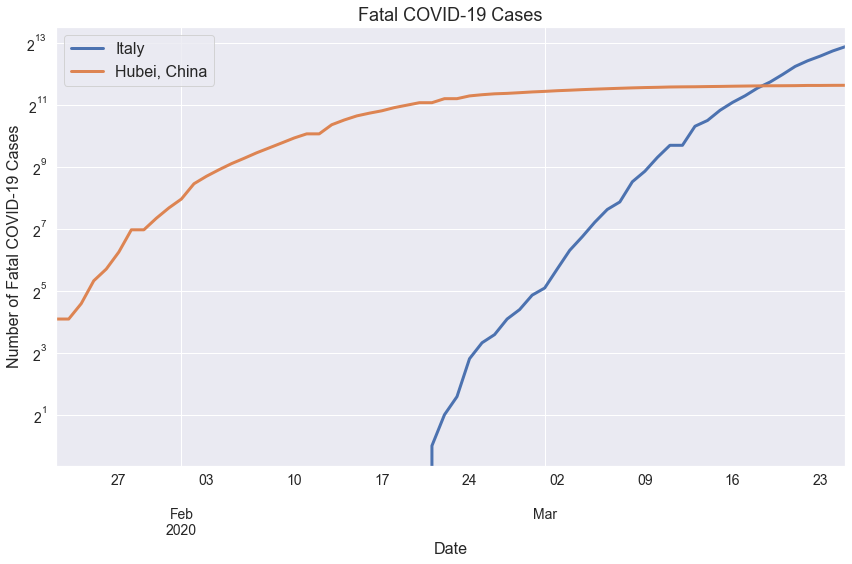

In [89]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China'])

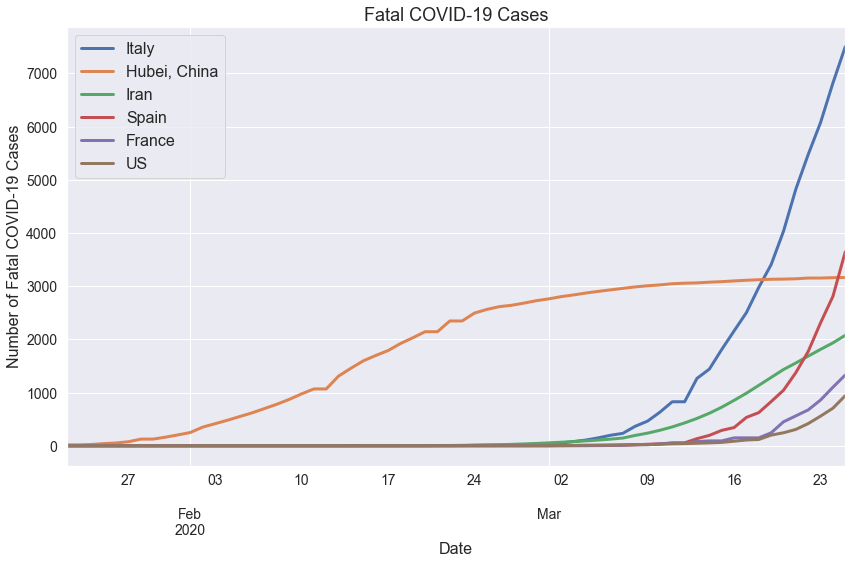

In [90]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US'], y_type='linear')

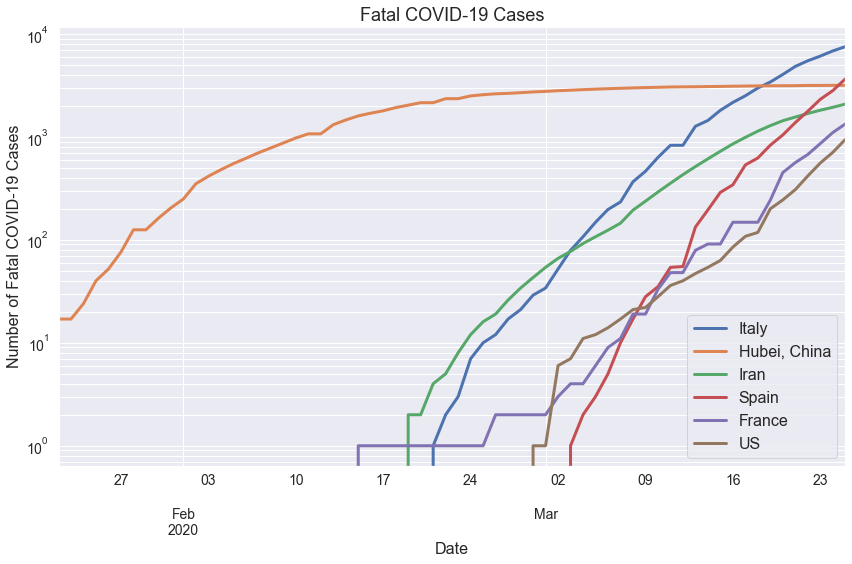

In [92]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US'], y_type='log', y_scale_base=10)

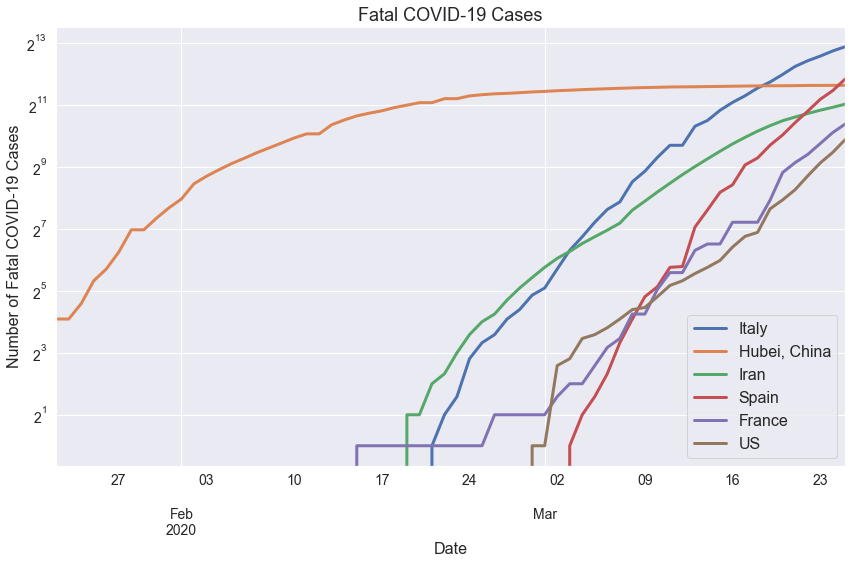

In [93]:
plot_covid_19_data_mpl(case_type='Fatal', locations=['Italy', 'Hubei, China', 'Iran', 'Spain', 'France', 'US'], y_type='log', y_scale_base=2)